<a href="https://colab.research.google.com/github/9jam/w266-final-project/blob/main/RuCases_Word2Vec_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec generation in Russian from the Meduza corpus
## 1. LOADING DATA

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
meduza_bal = pd.read_pickle("/content/drive/MyDrive/meduza_bert_big_df.pkl")
meduza_bal

,text,target,orig_word,new_word,case,shift_case,adj
4636,Даже в коллективном творчестве редко можно обо...,0,произведению,произведение,Dat,Nom,0
65395,Кто-то промолчал по ряда личных причин.,0,ряду,ряда,Dat,Gen,0
87153,Направлять трафику за пределы России будет зап...,0,трафик,трафику,Acc,Dat,0
159623,"К январю 2019 года в сети, задолжавшей кредито...",0,кредиторам,кредиторов,Dat,Acc,0
152020,У каждого фонда есть свой устав и положение о ...,0,программах,программ,Loc,Gen,0
...,...,...,...,...,...,...,...
25876,Главное туристическое развлечение — поездки на...,1,None,None,None,None,None
35014,На 11 поехала в БТИ подписывать договор с детя...,0,детьми,детям,Ins,Dat,0
173747,В 2017 год ситуация повторилась — и вице-премь...,0,году,год,Loc,Acc,0
106220,С 1 августу авиакомпания будет отчислять в спе...,0,августа,августу,Gen,Dat,0


In [ ]:
drive.flush_and_unmount()

In [ ]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    #text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    #text = re.sub('@[^\s]+','USER', text)
    text = re.sub('[1-9]+', 'цфр', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    #text = re.sub(' +',' ', text)
    return text.strip()

In [ ]:
preprocessed_data = meduza_bal.text.apply(lambda x: len(x.split()))

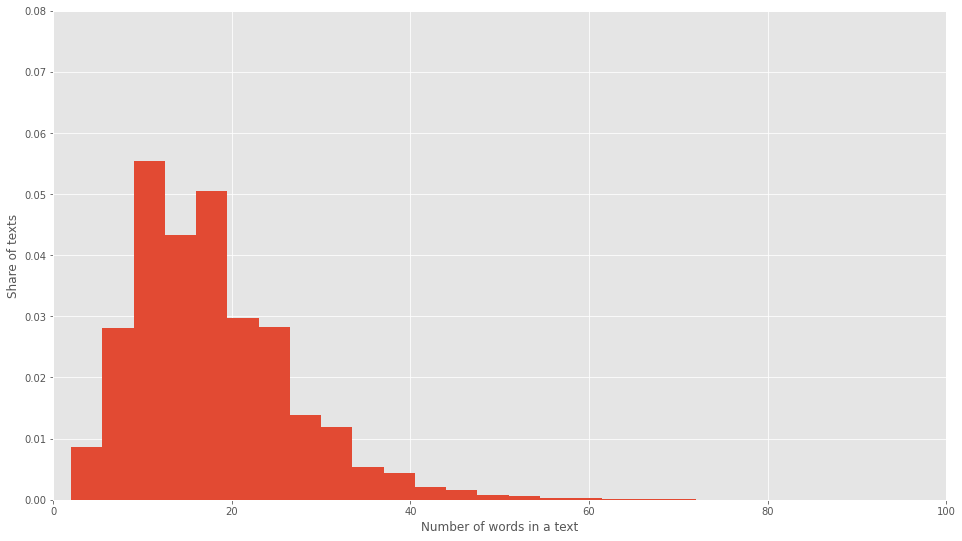

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(16, 9)) 
# facecolor='g'
n, bins, patches = plt.hist(preprocessed_data.values, 50, density=True)
plt.xlabel('Number of words in a text')
plt.ylabel('Share of texts')
plt.axis([0, 100, 0, 0.08])
plt.grid(True)
plt.show()

In [ ]:
for i in range(40, 60, 1):
    preprocessed_data>i
    print("%0.5f for sentence_length=%r" % (1-(preprocessed_data>i).sum()/preprocessed_data.shape[0], i))

0.97880 for sentence_length=40
0.98145 for sentence_length=41
0.98384 for sentence_length=42
0.98588 for sentence_length=43
0.98762 for sentence_length=44
0.98917 for sentence_length=45
0.99044 for sentence_length=46
0.99165 for sentence_length=47
0.99264 for sentence_length=48
0.99350 for sentence_length=49
0.99434 for sentence_length=50
0.99509 for sentence_length=51
0.99567 for sentence_length=52
0.99624 for sentence_length=53
0.99667 for sentence_length=54
0.99708 for sentence_length=55
0.99741 for sentence_length=56
0.99775 for sentence_length=57
0.99804 for sentence_length=58
0.99828 for sentence_length=59


## 2. Training the model
Gensim [3] was used for obtaining vector representations of Russian words. The model was trained on the entire dataset, which was collected and pre-processed at the previous steps.

In [ ]:
data = list(meduza_bal.text.apply(lambda x: preprocess_text(x).split()))

In [ ]:
data[0:5]

[['даже',
  'в',
  'коллективном',
  'творчестве',
  'редко',
  'можно',
  'обойтись',
  'без',
  'основного',
  'автора',
  'который',
  'придал',
  'бы',
  'направление',
  'произведение',
  'и',
  'попытался',
  'бы',
  'в',
  'нем',
  'хоть',
  'что',
  'то',
  'сказать',
  'а',
  'не',
  'только',
  'рассказать'],
 ['кто', 'то', 'промолчал', 'по', 'ряда', 'личных', 'причин'],
 ['направлять',
  'трафику',
  'за',
  'пределы',
  'россии',
  'будет',
  'запрещено',
  'кроме',
  'случаев',
  'когда',
  'это',
  'затрагивает',
  'сообщения',
  'между',
  'пользователями',
  'из',
  'калининградской',
  'области',
  'и',
  'других',
  'регионов',
  'рф'],
 ['к',
  'январю',
  'цфр',
  'цфр',
  'года',
  'в',
  'сети',
  'задолжавшей',
  'кредиторов',
  'миллиарды',
  'рублей',
  'осталось',
  'лишь',
  'пять',
  'кинотеатров',
  'три',
  'закрылись',
  'еще',
  'цфр',
  'стали',
  'работать',
  'под',
  'другими',
  'брендами'],
 ['у',
  'каждого',
  'фонда',
  'есть',
  'свой',
  'уста

In [ ]:
import logging
import multiprocessing
import gensim
from gensim.models import Word2Vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#data = gensim.models.word2vec.LineSentence('tweets.txt')
model = Word2Vec(data, size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())

2021-07-28 09:24:29,700 : INFO : collecting all words and their counts
2021-07-28 09:24:29,703 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-28 09:24:29,769 : INFO : PROGRESS: at sentence #10000, processed 170085 words, keeping 38742 word types
2021-07-28 09:24:29,838 : INFO : PROGRESS: at sentence #20000, processed 338899 words, keeping 58900 word types
2021-07-28 09:24:29,904 : INFO : PROGRESS: at sentence #30000, processed 509227 words, keeping 74314 word types
2021-07-28 09:24:29,973 : INFO : PROGRESS: at sentence #40000, processed 678384 words, keeping 87065 word types
2021-07-28 09:24:30,046 : INFO : PROGRESS: at sentence #50000, processed 848871 words, keeping 98132 word types
2021-07-28 09:24:30,119 : INFO : PROGRESS: at sentence #60000, processed 1017186 words, keeping 107803 word types
2021-07-28 09:24:30,192 : INFO : PROGRESS: at sentence #70000, processed 1186679 words, keeping 116633 word types
2021-07-28 09:24:30,260 : INFO : PROGRESS:

In [ ]:
model.save("/content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v")

2021-07-28 09:27:01,720 : INFO : saving Word2Vec object under /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v, separately None
2021-07-28 09:27:01,725 : INFO : storing np array 'vectors' to /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.wv.vectors.npy
2021-07-28 09:27:01,974 : INFO : not storing attribute vectors_norm
2021-07-28 09:27:01,976 : INFO : storing np array 'syn1neg' to /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.trainables.syn1neg.npy
2021-07-28 09:27:02,296 : INFO : not storing attribute cum_table
2021-07-28 09:27:02,581 : INFO : saved /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v


## 3. Visualization

t-SNE was used to plot a subset of similar words from trained Word2Vec model. Firstly, similar words were found and appended each of the similar words embedding vector to the matrix. Secondly, t-SNE was applied to the matrix in order to project each word to a 2D space (i.e. dimension reduction). Finally, the 2D position of each word with a label was plotted.

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec.load('/content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v')

2021-07-28 09:27:23,474 : INFO : loading Word2Vec object from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v
2021-07-28 09:27:23,676 : INFO : loading wv recursively from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.wv.* with mmap=None
2021-07-28 09:27:23,678 : INFO : loading vectors from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.wv.vectors.npy with mmap=None
2021-07-28 09:27:23,813 : INFO : setting ignored attribute vectors_norm to None
2021-07-28 09:27:23,814 : INFO : loading vocabulary recursively from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.vocabulary.* with mmap=None
2021-07-28 09:27:23,815 : INFO : loading trainables recursively from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.trainables.* with mmap=None
2021-07-28 09:27:23,824 : INFO : loading syn1neg from /content/drive/MyDrive/w266_project/models/word2vec/meduza_w2v_big.w2v.trainables.syn1neg.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
% matplotlib inline


def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.tab10(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

In [ ]:
labels = []
tokens = []
classes = []

keywords1 = ['путин', 'коррупция', 'война', 'фсб', 'санкции', 'здоровье', 'роскомнадзор', 'красивый', 'нравится', 'навальный']
keywords2 = ['улица', 'место', 'рынок', 'разговор', 'решение', 'полиция', 'власть', 'больница', 'школа', 'встреча', 'год']

samples = 15
for i, word in enumerate(keywords2):#random.sample(list(model.wv.vocab), samples)):#['ссора', 'iphone', 'обидел', 'красивый', 'нравится', 'домашка']):#random.sample(list(model.wv.vocab), 10):
    tokens.append(model.wv[word])
    labels.append(word)
    classes.append(i)
    for similar_word, similarity in model.wv.most_similar(word, topn=5):
        tokens.append(model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i)

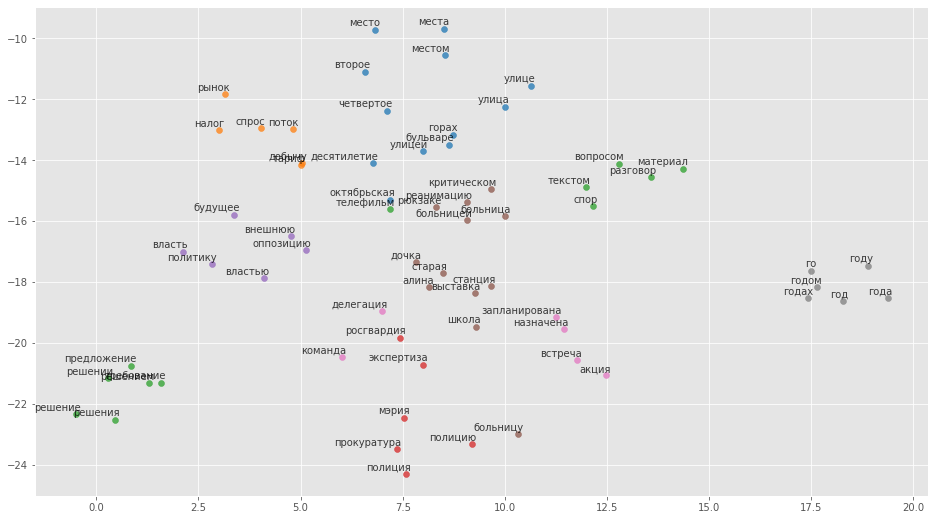

In [ ]:
tsne_plot(labels, tokens, classes, samples)

## References
1. Mikolov T. et al. Distributed representations of words and phrases and their compositionality //Advances in neural information processing systems. – 2013. – С. 3111-3119.
2. Rubtsova U. Constructing a corpus for sentiment classification training //Software and Systems. – 2015. – №. 109. – С. 72-78.
3. Rehurek R., Sojka P. “Software framework for topic modelling with large corpora”, Proceedings of the LREC 2010 Workshop on New Challenges for NLP Frameworks, pp. 46-50, 2010.

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->